<a href="https://colab.research.google.com/github/Raoufmamedov/HH.ru-parsing/blob/main/%22Base_%22Parsing_HH_240224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЦЕЛЬ РАБОТЫ: Парсинг сайта HH.ru для изучения распределения вакансий по специальность Data Scientist открытых в г. Москве по уровню позиции и ожидаемому опыту кандидата.


In [1]:
!pip install requests
!pip install beautifulSoup4
from pprint import pprint # Импортируем функцию pprint()
import json, requests, pytz
import pandas as pd
import numpy as np
from bs4  import BeautifulSoup
from datetime import datetime
!pip install lxml
# pytz.all_timezones
from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [58]:
# url='https://hh.ru/search/vacancy?L_save_area=true&text=Data+scientist&excluded_text=&salary=&currency_code=RUR&experience=doesNotMatter&order_by=relevance&search_period=0&items_on_page=50000'

Проведём парсинг страниц по запросу Data Scientist с извлечением текстовой информации из раздела 'main', создавая словарь описаний по страницам и далее объединяя его содержимое в единый список.

In [59]:
BSMPDict=dict()
page = 0
while page <15:
      url = f"https://hh.ru/vacancies/data-scientist?page={page}"
      # url = f"https://hh.ru/vacancies/data-engineer?page={page}"
      # url = f"https://hh.ru/search/vacancy?text=Machine+learning"
      # url = f"https://hh.ru/search/vacancy?text=Data+scientist"
      BSMPDict[str(page)]=BeautifulSoup(requests.get(url,
                                                     headers={'User-Agent':
                                                              'Mozilla/5.0'}).
                                        text, parser='html.parser')
      page = page + 1
listofvacs=[]
for dic in BSMPDict:
  for doc in [*BSMPDict[dic].find_all('main')]:
    listofvacs.append(doc.get_text(separator=' ', strip=True))
# ct = datetime.now(pytz.timezone('Europe/Moscow')).strftime("%d.%m.%y %H:%M")

Очищаем текст от невидимых пробельных символов, преобразуем список в единую строку

In [60]:
listofvacs_clear=[i.replace("\xa0", " ") for i in listofvacs]
listofvacs_clear=[i.replace("\u202f", " ") for i in listofvacs_clear]
# listofvacs_clear=[i.replace('фильтры 1 2 3 4 5 ... 7 дальше|2 3 4 5 6 7 дальше|3 4 5 6 7 дальше', " ") for i in listofvacs_clear]
listofvacs=listofvacs_clear
listofvacs=" ".join(listofvacs)

In [61]:
# Модуль сохранения спарсенного текста
def vac_desc_dumper(list_to_dump, timestamp=False):
  if timestamp:
    ct = datetime.now(pytz.timezone('Europe/Moscow')).strftime("%d.%m.%y %H:%M")
    print(listofvacs, file=open('hh_ru_mul('+ct+').txt','w'))
  else:
    print(listofvacs, file=open('hh_ru_mul.txt','w'))

Посмотрим что у нас получилось

In [62]:
# from pprint import pprint
pprint(listofvacs)

('Junior Data Scientist B2B-Center Москва , Сокольники Без опыта Откликнуться '
 'Откликнуться Data Scientist Ventra IT Solutions Москва Опыт от 1 года до 3 '
 'лет Работодатель сейчас онлайн Откликнуться Откликнуться По вашему запросу '
 'ещё будут появляться новые вакансии. Присылать вам? data scientist Москва '
 'Ключевые слова в названии вакансии, в названии компании и в описании '
 'вакансии Да, на почту В мессенджер Data Scientist / Аналитик Данных middle '
 '(удаленно) 120 000 – 220 000 ₽ Лепёхина Лилия Миниахматовна Москва Опыт от 1 '
 'года до 3 лет Можно из дома Откликнуться Откликнуться Machine Learning '
 'Engineer от 200 000 ₽ ООО Интерком Москва Опыт от 1 года до 3 лет Можно из '
 'дома Откликнуться Откликнуться Data Scientist (валидация моделей) Московский '
 'Кредитный Банк. Профессионалы Москва , Деловой центр и еще 1 Опыт от 1 года '
 'до 3 лет Отклик без резюме Откликнуться Откликнуться Стажер Data Scientist '
 'Сбер для экспертов Москва Без опыта Откликнуться Отклик

Для фиксации состояния нашнего описания вакансий, сохраним список в текстовый файл

In [63]:
vac_desc_dumper(listofvacs, timestamp=False)

In [64]:

# response = requests.get(url,  headers={'User-Agent': 'Mozilla/5.0'}) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
# # page = BeautifulSoup(response.text) # Создаём объект BeautifulSoup, указывая html-парсер
# page = BeautifulSoup(response.text, from_encoding='utf-8') # Создаём объект BeautifulSoup, указывая html-парсер
# # print(page.title) # Получаем тег title, отображающийся на вкладке браузера
# # print(page.title.text) # Выводим текст из полученного тега, который содержится в атрибуте text

# # print(page.body) # Получаем тег title, отображающийся на вкладке браузера
# # print(page.body.text) # Выводим текст из полученного тега, который содержится в атрибуте text

In [65]:
parsed='hh_ru_mul.txt'

In [66]:
pd.set_option('max_colwidth', 250)
pd.set_option('display.width', 500)

Преобразуем текст в серию Pandas и очистим её

In [67]:
vacs=pd.read_csv(parsed, sep="Откликнуться", engine='python', header=None).squeeze().T
vacs=vacs.str.lower()
vacs=vacs.str.replace("фильтры|в начало|показать|контакты|1 2 3 4 5 ... 7|\
дальше|2 3 4 5 6 7|3 4 5 6 7", " ")
vacs.str.strip()
vacs=vacs.str.replace("по вашему запросу ещё будут появляться новые вакансии. \
присылать вам?", "")
vacs=vacs.str.replace("ключевые слова в названии вакансии, в названии компании", "")
vacs=vacs.str.replace("   |  ", "")
vacs=vacs.str.replace("и в описании вакансии|попробуйте другие варианты \
поискового запроса", " ")
vacs=vacs.str.replace("работодатель сейчас онлайн|откликнитесь среди первых|\
можно без резюме", " ")
vacs=vacs.str.replace("да, на почту в мессенджер|узнать о жизни в компании", " ")
vacs=vacs.str.replace("исследователь математик", " ")
vacs=vacs.str.replace("data mining data science data analyst data big data \
machine learning master data hadoop", " ")
vacs=vacs.str.replace("подработка|за сутки|за последние три дня|и еще 1|и еще 3|\
и еще 2", " ")
vacs=vacs.str.replace("попробуйте другие варианты поискового запроса", " ")
# vacs=vacs.str.replace("попробуйте другие варианты поискового запроса", " ")
# vacs=vacs.str.replace("можно из домa|откликнитесь среди первых|можно без резюмe|на почту|в мессенджер", " ")
vacs=vacs.str.replace("быстрые без опыта работы полная занятость частичная|\
занятость проектная работа полный день|сменный график\
|вахтовый метод удаленная работа гибкий график|от прямых работодателей|для людей\
с инвалидностью|быстрые без опыта", " ")
# # исследователь математик подработка за сутки за последние три дня без|а работы полная занятость частичная занятость проектная работа полный день сменный график вахтовый метод удаленная работа гибкий график от прямых работодателей для людей с инвалидностью", "")


# Убираем последнюю запись которая всегда содержит списоперечисление возможных условий и графика занятости и преобразуем серию в датафрейм
vacs=vacs[:-1].to_frame()
vacs['sal KRUR']=vacs.get(0).apply(lambda x: [int(s) for s in x.split() if \
 (s.isdigit() and 1905>int(s)>10)])
vacs['experience']=vacs.get(0).apply(lambda x: [int(s) for s in x.split() if \
 (s.isdigit() and 7>int(s)>0 and int(s) in [1, 3, 6])])
vacs['sal']=vacs['sal KRUR'].apply(lambda x:" ".join(map(str, x)))
# vacs['experience']=vacs['experience'].apply(lambda x:" ".join(map(str, x)))
vacs

,0,sal KRUR,experience,sal
0,"junior data scientist b2b-center москва , сокольники без опыта",[],[],
1,,[],[],
2,data scientist ventra it solutions москва опыт от 1 года до 3 лет,[],"[1, 3]",
3,,[],[],
4,? data scientist москва data scientist / аналитик данных middle (удаленно) 120 000 – 220 000 ₽ лепёхина лилия миниахматовна москва опыт от 1 года до 3 лет можно из дома,"[120, 220]","[1, 3]",120 220
...,...,...,...,...
671,,[],[],
672,"data scientist в направление ""работодатели"" ооо headhunter::analytics/data science москва , алексеевская опыт от 3 до 6 лет",[],"[3, 6]",
673,,[],[],
674,"data scientist в b2c направление ооо headhunter::analytics/data science москва , алексеевская опыт от 3 до 6 лет",[],"[3, 6]",


Мы очистили наш датасет от балластной информации и выделили 2 признака: стаж и оклад. Посмотрим, достаточно ли у нас данных для проведения исследования.

In [68]:
vacs[0][vacs[0].str.contains('senior')]

54                                                                                          middle / senior nlp data scientist пао «мтс» кибербезопасность москва   опыт от 3 до 6 лет 
100           быстрые      без опыта работы полная занятость частичная         для людей с инвалидностью data scientist (middle/senior) до 450 000 ₽ rubbles москва опыт от 3 до 6 лет 
112                                                                     senior data scientist ооо бюро кредитных историй скоринг бюро москва , комсомольская опыт от 1 года до 3 лет   
118                                                                                                       data scientist middle/senior x5 tech москва опыт от 3 до 6 лет можно из дома 
124                                                           middle+/senior data scientist (модели кредитного риска) альфа-банк. ит-специалисты москва , технопарк опыт от 3 до 6 лет 
                                                                                

In [69]:

# vacs.get(0).str.split('(\опыт)', expand=True).isna().sum()

In [70]:
vacs['sal KRUR']=vacs['sal KRUR'].apply(lambda x: x if len(x)>0 else np.nan) # Очистка серии от пустых спиской

In [71]:
vacs['sal KRUR'].notna().sum()

34

In [72]:
# Определение процента записей содержащих данные о зарплатных предложениях
sal_av=vacs['sal KRUR'].notna().sum()
vac_with_sal_pct=round(100*vacs['sal KRUR'].value_counts(dropna=False, normalize=True)[1:].sum(), 1)
Markdown(f' Итак, у нас имеются данные по предлагаемому окладу только для {sal_av} вакансий что составляет {vac_with_sal_pct} % от количества записей в датасете.')

 Итак, у нас имеются данные по предлагаемому окладу только для 34 вакансий что составляет 5.0 % от количества записей в датасете.

In [73]:
# vacs[vacs['sal KRUR'].notna()]

По зарплатам мы имеем 3 вида записей:

1) С чётко определённым диапазоном зарплат

2) С указанием максимального оклада

3) С указанием минимального оклада

Учитывая это, нам необходимо выделить не тоько цифры но и слова "до" и "от", ограничивающие полузамкнутые интервалы.

In [74]:
import re
pat='([a-я]*\s\d{1,3}\s\d{3}\s)'
a=vacs.get(0).str.findall(pat)
vacs['sal']=vacs.get(0).str.findall(pat).apply(lambda x: x if len(x)>0 else np.nan)
vacs.head()

,0,sal KRUR,experience,sal
0,"junior data scientist b2b-center москва , сокольники без опыта",NaN,[],NaN
1,,NaN,[],NaN
2,data scientist ventra it solutions москва опыт от 1 года до 3 лет,NaN,"[1, 3]",NaN
3,,NaN,[],NaN
4,? data scientist москва data scientist / аналитик данных middle (удаленно) 120 000 – 220 000 ₽ лепёхина лилия миниахматовна москва опыт от 1 года до 3 лет можно из дома,"[120, 220]","[1, 3]","[ 120 000 , 220 000 ]"


Преобразуем данные по зарплатам в признаки минимального и максимального оклада

In [75]:
def splitter(row):
  minval=np.nan
  maxval=np.nan
  if isinstance(row, float):
    # minval=np.nan
    # maxval=np.nan
    return minval, maxval
  else:
      if pd.Series(row).str.contains('от').any():
        minval=row[0][-8:]
        return minval, maxval
      elif pd.Series(row).str.contains('до').any():
        maxval=row[0][-8:]
        return minval, maxval
      else:
        try:
          minval=row[0]
          maxval=row[1]
        except:
          row=row.str.strip(row)
          print(row)
          # row=[float(elem.replace(' ', '')) for elem in row]
          minval=row[0]
          maxval=row[1]
          return minval, maxval
        finally:
          return minval, maxval
a =vacs['sal'].apply(splitter)

Поскольку у нас имеются зарплаты указанные в долларах, нам необходимо осуществить преобразование их значений в рублёвый эквивалент по текущему курсу.
Для этого запрашиваем значение курса и сохраняем его в переменную usd.

In [76]:
import xml.etree.ElementTree as et
v_date = datetime.now().strftime("%d.%m.%Y")
# Адрес api метода для запроса get
url = 'https://www.cbr.ru/scripts/XML_daily.asp'
params = {
    'date_req': v_date
}
# Отправляем get request (запрос GET)
response = requests.get(url, params)
tree = et.ElementTree(et.fromstring(response.text))
root = tree.getroot()
df_cols = ["name", "value"]
rows = []
for node in root:
    s_name = node.find("Name").text if node is not None else None
    s_value = node.find("Value").text if node is not None else None
    rows.append({"name": s_name, "value": s_value})

currate = pd.DataFrame(rows, columns = df_cols)
usd=float(currate[currate.name.str.contains('США')]['value'].str.replace(",", "."))
usd

92.7519

In [77]:
#извлекаем признак минимального оклада и очищаем его от слов и преобразуем в формат с плавающей точкой
vacs['Sal_min']=a.apply(lambda x: x[0]).str.strip().str.replace(" ", "").str.extract(pat='(\d{1,3}\d{3})')
vacs['Sal_min']=pd.to_numeric(vacs['Sal_min'], errors='coerce')

#Tе же операции (кроме очистки от слов) проводим и на признаке максимальной зарплаты
vacs['Sal_max']=a.apply(lambda x: x[1]).str.strip().str.replace(" ", "")
vacs['Sal_max']=pd.to_numeric(vacs['Sal_max'], errors='coerce')

In [78]:
vacs['Sal_max']=vacs['Sal_max'].apply(lambda x: x*usd if x<15000 else x)
vacs['Sal_min']=vacs['Sal_min'].apply(lambda x: x*usd if x<15000 else x)

Мы извлекли информацию по имеющимся в записях зарплатам. Получим статистику по максимальным и минимальным значениям предлагаемых окладов (в тыс. рублей).

In [79]:
salstat=(vacs[['Sal_min', 'Sal_max']].describe().iloc[1:,:]/1000).round(1).T

In [80]:
salstat

,mean,std,min,25%,50%,75%,max
Sal_min,205.5,103.1,40.0,132.5,185.5,250.0,480.0
Sal_max,271.5,114.8,55.0,200.0,250.0,330.0,500.0


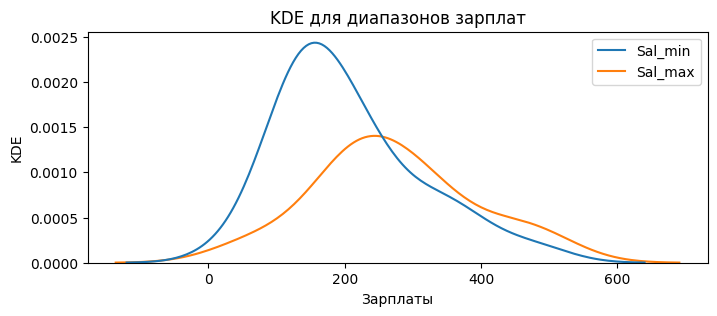

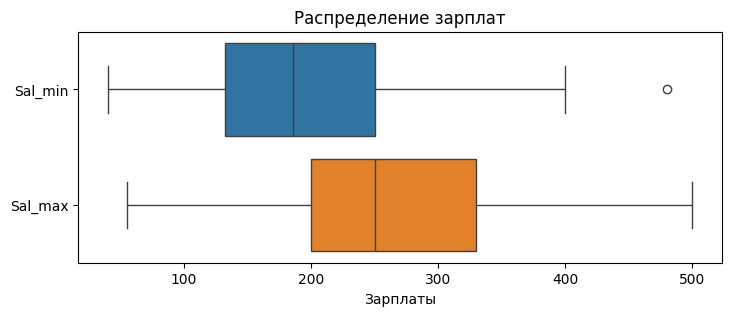

In [81]:

# axis.set_tick_params(labelsize=7)
plt.figure(figsize=[8, 3])
plt.tick_params(axis='both', which='minor', labelsize=12)
trursal=vacs[['Sal_min', 'Sal_max']]/1000
x_label='Зарплаты'
sns.kdeplot(trursal).set(title="KDE для диапазонов зарплат", xlabel=x_label, ylabel='KDE')
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.show()
plt.figure(figsize=[8.3, 3])
sns.boxplot(trursal,  orient='h').set(xlabel=x_label, title='Распределение зарплат')
plt.show()

In [82]:
display(Markdown(f'Итак, минимальное значение указанной минимальной зарплаты составляет {vacs.Sal_min.min().round(0)/1000} т. р., \
а её максимальное значение составляет {(vacs.Sal_min.max()/1000).round(0)} т. р.'))
display(Markdown(f'Минимальное наблюдаемое значение верхнего предела диапазона зарплат равно {(vacs.Sal_max.min()/1000).round(0)} т. р., а максимальное наблюдаемое значение составляет \
{(vacs.Sal_max.max()/1000).round(0)} т. р., но скорее всего является выбросным (ищется уникальный высококвалифицированные специалист). \
Медианные значения зарплат лежат в пределах {salstat["50%"].min()} - {salstat["50%"].max()} т. р. В целом характер распределения зарплат близок к нормальному.'))

Итак, минимальное значение указанной минимальной зарплаты составляет 40.0 т. р., а её максимальное значение составляет 480.0 т. р.

Минимальное наблюдаемое значение верхнего предела диапазона зарплат равно 55.0 т. р., а максимальное наблюдаемое значение составляет 500.0 т. р., но скорее всего является выбросным (ищется уникальный высококвалифицированные специалист). Медианные значения зарплат лежат в пределах 185.5 - 250.0 т. р. В целом характер распределения зарплат близок к нормальному.

Мы, однако должны понимать что зарплаты указали в основном компании заинтересованные в привлечении опытных специалистов, знающих цену своей квалификации и предпочитающих сразу получить информацию о предлагаемой компенсации, в то время как оклад начинающих специалистов указывается значительно реже. Поэтому реальные меры центральной тенденции скорее всего значительно ниже.

Удалим серии которые нам больше не потребуются и проведём дальнейшее выделение интересующей нас информации

In [83]:
vacs.drop(["sal", "sal KRUR"], axis=1, inplace=True)

Преобразуем уже имеющийся в нашем распоряжении категориальный признак experience (стаж кандидата)

In [84]:
exp_mapping={"без опыта":"<1 г",
             "опыт от 1 года до 3 лет": "1-3 г",
             "опыт от 3 до 6 лет":"3-6 л",
             "более 6 лет": ">6 л"}

def contains_mapper(x):
    group = ""
    for key in exp_mapping:
        if key in x:
            group = exp_mapping[key]
            break
        else:
           group=np.nan
    return group

vacs['experience']=vacs.get(0).apply(contains_mapper)


In [85]:
exp_dist=vacs['experience'].value_counts(dropna=False)
exp_dist.index=exp_dist.index.fillna(value='N/A')
exp_dist_norm=round(exp_dist.transform(lambda x: x/sum(x))*100, 1)
display(exp_dist)

N/A      338
3-6 л    185
1-3 г    116
<1 г      22
>6 л      15
Name: experience, dtype: int64

In [86]:
exp_dist.index

Index(['N/A', '3-6 л', '1-3 г', '<1 г', '>6 л'], dtype='object')

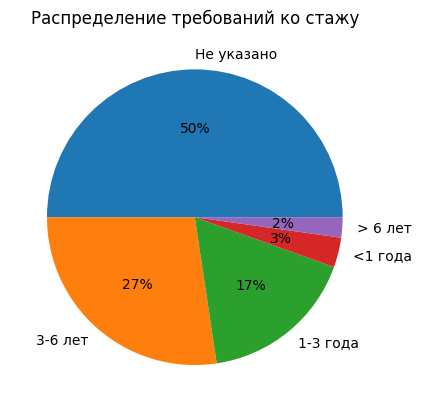

In [87]:
plt.title('Распределение требований ко стажу')
plt.pie(exp_dist, autopct='%.0f%%', labels=['Не указано', '3-6 лет', '1-3 года', '<1 года', '> 6 лет'])
plt.show()

Больше половины работодателей ожидают стаж 3-6 лет, чуть более трети согласны рассматривать кандидатов со стажем 1-6 лет.

In [88]:
Markdown(f'Количество вакансий с требуемым стажем менее 1 года и более 6 лет на рынке невелико, группа составляют \
 {exp_dist_norm[">6 л"]} % и {exp_dist_norm["<1 г"]} % соответственно')

Количество вакансий с требуемым стажем менее 1 года и более 6 лет на рынке невелико, группа составляют  2.2 % и 3.3 % соответственно

Попробуем доизвлечь из корпуса описаний (а именно из первого столбца) дополнительные признаки. Перед тем как это сделать, мы удалим из очищаемого столбца уже выделенную нами информацию по требованиям ко стажу.

In [89]:
vacs.iloc[:, 0]=vacs.get(0).str.replace('опыт от 1 года до 3 лет|опыт от 3 до 6 лет|без опыта|опыт более 6 лет', "")

Мы парсили данные для г. Москвы, соответственно данное слово для нас неинформативно и мы можем использовать его в качестве разделителя. Также у нас имеется словосочетание "можно из дома", которое возможно несёт какую-то информацию (его мы удалять не будем, но для разбиения применим).

In [90]:
a=vacs.get(0).str.split('москва|(можно из дома)', expand=True)
# .get(2).value_counts()

Проверим содержимое столбцов после разбиения

In [91]:
a.isna().sum()

0      0
1    676
2    338
3    601
4    595
5    675
6    675
dtype: int64

Итак у нас 2 признака без пропусков в первом и третьев столбце (колонки с индексамии 0 и 2), А также 3 столбца с пропусками (1, 5 и 6 колонки).
Посмотрим что содержат колонки с индексами  3 и 4.

In [92]:
a=a.iloc[:, np.r_[0, 2:5]]
a

,0,2,3,4
0,junior data scientist b2b-center,", сокольники",None,None
1,,None,None,None
2,data scientist ventra it solutions,,None,None
3,,None,None,None
4,? data scientist,data scientist / аналитик данных middle (удаленно) 120 000 – 220 000 ₽ лепёхина лилия миниахматовна,None,
...,...,...,...,...
671,,None,None,None
672,"data scientist в направление ""работодатели"" ооо headhunter::analytics/data science",", алексеевская",None,None
673,,None,None,None
674,data scientist в b2c направление ооо headhunter::analytics/data science,", алексеевская",None,None


Проверяем полученные серии

In [93]:
[print(a.loc[:, i].value_counts(dropna=False), '\n') for i in [3, 4]]

None             601
можно из дома     75
Name: 3, dtype: int64 

None                  595
                       70
                        5
                        4
 , профсоюзная          1
                        1
Name: 4, dtype: int64 



[None, None]

Итак в третьей серии довольно много записей содержащих условие "можно из дома", мы можем использовать его как ещё один признак нашего исследования, а серия 4 практически пустая и мы удаляем её.

In [94]:
# a.loc[:, 3].fillna(np.nan, inplace=True)
a.loc[:, 3]=np.where(a.get(3)=="можно из дома", True, False)
a=a.iloc[:, :-1]

<ipython-input-94-727197cb0714>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  a.loc[:, 3]=np.where(a.get(3)=="можно из дома", True, False)


Доочищаем данные от пробелов и символов, а также текста не несущего полезной информации

In [95]:
a[2]=a[2].str.strip("'  '|'    '|,")
a[0]=a[0].str.strip(',|)|(| ooo | пао | ао |.|+|-|&|[|?').str.replace('/|::', ' ').str.replace('(', ' ').str.replace(')', ' ')
a.loc[:, 2]=a.loc[:, 2].str.strip().str.replace("быстрые|работы полная занятость частичная|опыт|для людей с инвалидностью", " ").str.strip()

In [96]:
a.head(30)

,0,2,3
0,junior data scientist b2b-center,сокольники,False
1,,None,False
2,data scientist ventra it solutions,,False
3,,None,False
4,data scientist,data scientist / аналитик данных middle (удаленно) 120 000 – 220 000 ₽ лепёхина лилия миниахматовна,False
5,,None,False
6,machine learning engineer от 200 000 ₽ ооо интерком,,True
7,,None,False
8,data scientist валидация моделей московский кредитный банк. профессионалы,деловой центр отклик без резюме,False
9,,None,False


У нас имееется несколько позиций которые были неправильно распределены по столбцам. Проводим исправления, перенося из столбца 2 все тексты состоящие более чем из 3 слов (название станции метро редко состоит из более чем трёх слов).

In [97]:
a['b']=a.get(2).str.split(' ')
a['b']=a['b'][~a['b'].isna()].apply(len)>3 #индикаторый столбец
a[0]=np.where(a.get('b'), a.get(0)+' '+a.get(2), a.get(0))

In [98]:
a[0]

0                                                                                        junior data scientist b2b-center
1                                                                                                                     NaN
2                                                                                      data scientist ventra it solutions
3                                                                                                                     NaN
4      data scientist data scientist / аналитик данных middle (удаленно) 120 000 – 220 000 ₽ лепёхина лилия миниахматовна
                                                              ...                                                        
671                                                                                                                   NaN
672                                     data scientist в направление "работодатели" ооо headhunter analytics data science
673                     

In [99]:
a[2]=np.where(a.get('b'), np.nan, a.get(2))


In [100]:
locs=round(a.loc[:, 2].value_counts(normalize=True)*100, 0)
locs

                      69.0
кутузовская            5.0
выставочная            2.0
деловой центр          2.0
технопарк              2.0
новокузнецкая          2.0
павелецкая             2.0
войковская             1.0
отклик без резюме      1.0
калужская              1.0
алексеевская           1.0
баррикадная            1.0
зорге                  1.0
динамо                 1.0
марксистская           1.0
добрынинская           1.0
комсомольская          1.0
дмитровская            1.0
международная          1.0
профсоюзная            1.0
бауманская             1.0
белорусская            1.0
парк культуры          0.0
балтийская             0.0
сокольники             0.0
кунцевская             0.0
аэропорт               0.0
парк победы            0.0
славянский бульвар     0.0
лужники                0.0
сокол                  0.0
беговая                0.0
улица 1905 года        0.0
смоленская             0.0
кожуховская            0.0
сходненская            0.0
автозаводская          0.0
н

In [101]:
Markdown(f'Итак мы получили признак локаций,в котором у нас {int(locs[0])} % пропусков.  \
 Посмотрим как распределены известные нам адреса. ')

Итак мы получили признак локаций,в котором у нас 69 % пропусков.   Посмотрим как распределены известные нам адреса. 

In [102]:
locs_known=a.loc[:, 2].value_counts()*100
locs_known=(locs_known[1:].transform(lambda x: x/sum(x))*100).round(1)
locs_known

кутузовская           16.5
выставочная            5.8
деловой центр          5.8
технопарк              4.9
новокузнецкая          4.9
павелецкая             4.9
войковская             3.9
отклик без резюме      3.9
калужская              2.9
алексеевская           2.9
баррикадная            1.9
зорге                  1.9
динамо                 1.9
марксистская           1.9
добрынинская           1.9
комсомольская          1.9
дмитровская            1.9
международная          1.9
профсоюзная            1.9
бауманская             1.9
белорусская            1.9
парк культуры          1.0
балтийская             1.0
сокольники             1.0
кунцевская             1.0
аэропорт               1.0
парк победы            1.0
славянский бульвар     1.0
лужники                1.0
сокол                  1.0
беговая                1.0
улица 1905 года        1.0
смоленская             1.0
кожуховская            1.0
сходненская            1.0
автозаводская          1.0
новослободская         1.0
о

Мы видим что большинство указанных локаций находятся в районе Дорогомилово и (по состоянию на 30.10.23).

In [103]:
"""Здесь будет код разбора станций по округам"""

'Здесь будет код разбора станций по округам'

In [104]:
# "ЦАО":['Арбат', 'Басманный', 'Замоскворечье' 'Красносельский' 'Мещанский' 'Пресненский' Таганский Тверской Хамовники Якиманка]}

# metro_dict={"ЗАО": ['Киевская', Парк Победы, Проспект Вернадского, Юго-западная, Крылатское, Молодежная, Кунцевская, Пионерская, Филевский Парк, Багратионовская, Фили, Кутузовская, Студенческая].

У нас мало записей для работы, поэтому этот признак не будет для нас полезен, удаляем его и логический признак длмны строки b

In [105]:
a.columns

Index([0, 2, 3, 'b'], dtype='object')

In [106]:
a=a[[0, 3]]

Очищаем оставшийся элемент записи от остававшейся информации по зарплатным предложениям, а также выделим названия позиций

In [107]:
a.iloc[:, 0]=a.iloc[:, 0].str.replace(pat+"₽", " ")

<ipython-input-107-54198165bbcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.iloc[:, 0]=a.iloc[:, 0].str.replace(pat+"₽", " ")


Выделим из тела записи названия позиций и их уровни. Также посмотрим что собой предствавляют позиции в названии либо описании которых встречается упоминание обработки естественных языков (nlp)

In [108]:
a["trainee"]=a.get(0).str.contains('стажёр|стажер')
a["jun"]=a.get(0).str.contains('junior|младший')
a["senior"]=a.get(0).str.contains('senior|старший')
a["middle"]=a.get(0).str.contains('middle')
a["lead"]=a.get(0).str.contains('lead|team|ведущий')
a["data_scientist"]=a.get(0).str.contains('scientist|data scientist')
a["engineer"]=a.get(0).str.contains('engineer|инженер')
a["analyst"]=a.get(0).str.contains('analyst|аналитик|аналитик данных|data analyst')
a["prod_man_analyt"]=a.get(0).str.contains('product manager|product manager|product analyst')
a["разраб_dev"]=a.get(0).str.contains('разработчик|devops|product analyst|developer|python')
a["nlp"]=a.get(0).str.contains('nlp|natural language|(nlp)')
display(a)

<ipython-input-108-2a7b772e7be5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["trainee"]=a.get(0).str.contains('стажёр|стажер')
<ipython-input-108-2a7b772e7be5>:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  a["nlp"]=a.get(0).str.contains('nlp|natural language|(nlp)')


,0,3,trainee,jun,senior,middle,lead,data_scientist,engineer,analyst,prod_man_analyt,разраб_dev,nlp
0,junior data scientist b2b-center,False,False,True,False,False,False,True,False,False,False,False,False
1,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,data scientist ventra it solutions,False,False,False,False,False,False,True,False,False,False,False,False
3,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,data scientist data scientist / аналитик данных middle (удаленно) 120 000 – лепёхина лилия миниахматовна,False,False,False,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,"data scientist в направление ""работодатели"" ооо headhunter analytics data science",False,False,False,False,False,False,True,False,False,False,False,False
673,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674,data scientist в b2c направление ооо headhunter analytics data science,False,False,False,False,False,False,True,False,False,False,False,False


In [109]:
# a[a[a[0].str.strip().str.replace(" ","").str.extract(pat='(\d{1,3}\d{3})').notna()][0].notna()]
# # r'\d+\.\d+|\d+'

In [110]:
a.iloc[:, 1:].describe()

,3,trainee,jun,senior,middle,lead,data_scientist,engineer,analyst,prod_man_analyt,разраб_dev,nlp
count,676,338,338,338,338,338,338,338,338,338,338,338
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,True,False,False,False,False,False
freq,601,331,330,254,285,313,260,301,315,337,317,305


In [111]:
a.nlp.value_counts()

False    305
True      33
Name: nlp, dtype: int64

In [112]:
# a.columns=["Name", "address", "from home", "trainee", "jun", "senior",	"middle",	"lead",	"data_scientist",	\
#            "engineer",	"analyst", "prod_man_analyt",  "разраб_dev", "nlp"]
a.columns=["Name", "from_home", "trainee", "jun", "senior",	"middle",	"lead",	"data_scientist",	\
           "engineer",	"analyst", "prod_man_analyt",  "разраб_dev", "nlp"]

In [113]:
a

,Name,from_home,trainee,jun,senior,middle,lead,data_scientist,engineer,analyst,prod_man_analyt,разраб_dev,nlp
0,junior data scientist b2b-center,False,False,True,False,False,False,True,False,False,False,False,False
1,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,data scientist ventra it solutions,False,False,False,False,False,False,True,False,False,False,False,False
3,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,data scientist data scientist / аналитик данных middle (удаленно) 120 000 – лепёхина лилия миниахматовна,False,False,False,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,"data scientist в направление ""работодатели"" ооо headhunter analytics data science",False,False,False,False,False,False,True,False,False,False,False,False
673,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674,data scientist в b2c направление ооо headhunter analytics data science,False,False,False,False,False,False,True,False,False,False,False,False


После извлечения признаков, убираем их из тела основной записи. Также удалим тривиальные требования вроде владения языком Python

In [114]:
replacement="junior|senior|middle|lead|data scientist|engineer|analyst|product manager|product analyst|\
стажер|разработчик|devops|developer|аналитик данных|product analyst|старший|ведущий|data analyst|python"
a.iloc[:, 0]=a.iloc[:, 0].str.strip().str.replace(replacement, " ")

In [115]:
# a.Name=a.Name.str.strip().str.replace("?", " ")
# a.Name=a.Name.str.strip('/').str.replace('/', ' ')

# a.Name.str.strip("' '|\|(|)").str.replace('  ', ' ')

Мы видим что часть описаний была некорректно перенесена в соседний столбец. Исправляем эту ошибку перенося описания и удаляя их из соседнего столбца

In [116]:
# replcement_mask=list(a[a.Name.apply(lambda x: len(x)==1)].index)
# a['Name'].loc[np.r_[replcement_mask]]=a.iloc[np.r_[replcement_mask]].address.copy()
# a['Name'].loc[np.r_[replcement_mask]]
# a['address'].loc[np.r_[replcement_mask]]=np.nan

# a['address'].loc[np.r_[replcement_mask]]
# # a.address.replace(np.r_[2, 100, 150, 199, 249, 299])

In [117]:
# a.drop('address', axis=1, inplace=True)

In [118]:
a

,Name,from_home,trainee,jun,senior,middle,lead,data_scientist,engineer,analyst,prod_man_analyt,разраб_dev,nlp
0,b2b-center,False,False,True,False,False,False,True,False,False,False,False,False
1,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ventra it solutions,False,False,False,False,False,False,True,False,False,False,False,False
3,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/ (удаленно) 120 000 – лепёхина лилия миниахматовна,False,False,False,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,"в направление ""работодатели"" ооо headhunter analytics data science",False,False,False,False,False,False,True,False,False,False,False,False
673,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674,в b2c направление ооо headhunter analytics data science,False,False,False,False,False,False,True,False,False,False,False,False


Объединим данные в единый датасет и уберём лишние столбцы

In [119]:
full=pd.concat([a, vacs], axis=1)
# .drop('0', axis=1, inplace=True)
# full=
# full[['Name', 'from home', 'jun', 'senior', 'middle', 'lead', 'data_scientist', 'engineer', 'analyst', 'prod_man_analyt', 'trainee', 'разраб_dev', 'nlp', 'experience', 'Sal_min', 'Sal_max']]
full

,Name,from_home,trainee,jun,senior,middle,lead,data_scientist,engineer,analyst,prod_man_analyt,разраб_dev,nlp,0,experience,Sal_min,Sal_max
0,b2b-center,False,False,True,False,False,False,True,False,False,False,False,False,"junior data scientist b2b-center москва , сокольники",<1 г,NaN,NaN
1,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN
2,ventra it solutions,False,False,False,False,False,False,True,False,False,False,False,False,data scientist ventra it solutions москва,1-3 г,NaN,NaN
3,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN
4,/ (удаленно) 120 000 – лепёхина лилия миниахматовна,False,False,False,False,True,False,True,False,True,False,False,False,? data scientist москва data scientist / аналитик данных middle (удаленно) 120 000 – 220 000 ₽ лепёхина лилия миниахматовна москва можно из дома,1-3 г,120000.0,220000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN
672,"в направление ""работодатели"" ооо headhunter analytics data science",False,False,False,False,False,False,True,False,False,False,False,False,"data scientist в направление ""работодатели"" ооо headhunter::analytics/data science москва , алексеевская",3-6 л,NaN,NaN
673,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN
674,в b2c направление ооо headhunter analytics data science,False,False,False,False,False,False,True,False,False,False,False,False,"data scientist в b2c направление ооо headhunter::analytics/data science москва , алексеевская",3-6 л,NaN,NaN


Мы видим что среди компаний часто встречаются дочерние общества и подразделения Сбер-а. Посмотрим сколько раз слово Сбер и его вариации встречаются в названиях работодателей

In [120]:
full.Name=full.Name.str.replace('сбер|сбер.|sber.', ' sber ')

In [121]:
round(full.Name.str.contains('sber').value_counts(True)*100, 0)

False    77.0
True     23.0
Name: Name, dtype: float64

Практически каждая 4 вакансия открыта в СБЕР-е, таким образом он один из важнейших работодателей осуществляющих поиск сотрудников на рынке Москвы.
Посмотрим какие ещё крупные работадатели присутствуют на рынке.для этого найдём слова встречающиеся чаще одного раза

In [122]:
# round(full.Name.str.contains('ozon|озон').value_counts(True)*100, 0)

In [123]:
# round(full.Name.str.contains('банк').value_counts(True)*100, 0)

In [151]:
pd.Series(full.Name.unique()).str.split(',')[:]

0                                                            [    b2b-center]
1                                                                         NaN
2                                                     [  ventra it solutions]
3              [    /     (удаленно) 120 000 –  лепёхина лилия миниахматовна]
4                                         [machine learning     ооо интерком]
                                        ...                                  
313                                                          [   sber лизинг]
314                [   ,  ранжирование поиска ozon информационные технологии]
315                                    [     анализ цены и trade in  домклик]
316    [  в направление "работодатели" ооо headhunter analytics data science]
317               [  в b2c направление ооо headhunter analytics data science]
Length: 318, dtype: object

In [125]:
pd.Series(" ".join(full.Name.unique()).split(" ")).str.strip(",|)|.|+|–|-|&|$|\\|[").value_counts().index

TypeError: sequence item 1: expected str instance, float found

In [ ]:
full.Name

In [126]:
wordstat=pd.Series(" ".join(full.Name.unique()).split(" ")).str.strip(',|)|.|+|–|-|&|$|\\|[').value_counts()
wordstat=wordstat[1:] # убираем данные по количеству пробелов
[*wordstat[wordstat>1].sort_values(ascending=False).items()]

TypeError: sequence item 1: expected str instance, float found

Выделим вручную крупных игроков на рынке и посмотрим сколько вакансий приходится на их долю.
Приведём названия к единому виду

In [ ]:
companies=['втб', 'ozon', 'abbott laboratories', 'билайн:', '«росбанк»',\
           'иннотех,', 'samokat.tech', 'газпромбанк', 'вск,', 'мтс',\
           'wildberries', 'vk', 'sportmaster', 'лига', 'сибур', \
           'русский стандарт', 'домклик', 'мегафон', 'нлмк', 'lamoda', 'sber',\
           'okko', 'skillbox', 'дом.рф', 'headhunter', 'авито', 'синергия',\
           'райффайзен', 'ростелеком', 'еаптека', 'softline', 'лига ставок',\
           'русский стандарт']
occur=round(100*full.Name.str.contains('|'.join(companies)).value_counts(True), 0)

full.Name=full.Name.str.replace('сбер.|сбермаркет|сбермаркет|сбер', 'sber')
full.Name=full.Name.str.replace('вконтакте', 'vk')
full.Name=full.Name.str.replace('«спортмастер»', 'sportmaster')
full.Name=full.Name.str.replace('«мтс»|мтс,', 'mts')
# full.Name=full.Name.str.replace('«мтс»,', 'мтс')
full.Name=full.Name.str.replace('озон,', 'ozon')
full.Name=full.Name.str.replace('«промсвязьбанк»|псб', 'psb')
full.Name=full.Name.str.replace('«промсвязьбанк»|псб', 'psb')

Создаём новую серию, которая буде содержать в себе толька названия вышеперечисленных компаний без дублирования.

In [ ]:
full['Companies'] = full.Name.apply(lambda x: ' '.
                                    join(np.array(x.split(' '))
                                    [np.in1d(x.split(' '), companies)]))
full['Companies']=full['Companies'].apply(lambda x:  ' '.join(set(x.split())))

In [ ]:
Markdown(f'Итак на {len(companies)} компаний приходится {int(occur[0])} % случаев упоминания (возможно неоднократное упоминание).')

In [ ]:
full['Companies']=full['Companies'].replace('', np.nan)

In [ ]:
compstat=full['Companies'][full['Companies'].notna()].value_counts(dropna=True, normalize=True)


In [ ]:
compstat

Для всех остальных компаний будем использовать класс 'other'

In [ ]:
full.Companies.fillna('other', inplace=True)

In [ ]:
saldict=dict()
for i in companies:
  saldict[i]=full[full.Companies==i][['Sal_min', 'Sal_max']].agg(['min', 'max', 'median', 'count'])
saldict

In [ ]:
full.columns

In [ ]:
salmindict=dict()
salmaxdict=dict()
for i in ["from_home", 'trainee', 'jun', 'middle', 'senior',  'lead', 'data_scientist', \
          'engineer', 'analyst', 'prod_man_analyt', 'разраб_dev', 'nlp']:
  salmindict[i]=full.query(i)['Sal_min'].agg(['min', 'max', 'median', 'count'])
  salmaxdict[i]=full.query(i)['Sal_max'].agg(['min', 'max', 'median', 'count'])


In [ ]:
# pd.DataFrame(salmaxdict).iloc[:-1,:]
# pd.DataFrame(salmindict).iloc[:-1,:]

In [ ]:
(pd.concat([pd.DataFrame(salmindict).iloc[:-1,:], pd.DataFrame(salmaxdict).iloc[:-1,:]]).T/1000).round(0)

Нам не удалось получить оценки зарплат для позиций уровня lead, junior и trainee. По остальным позициям, нужно понимать что один и тот же оклад может указываться для специалистов разных уровеней, или специалистов совмещающих различный функционал. Поэтому таблицу следует рассматривать как индикатор оклада который может быть предложен кандидату претендующую на позицию, которая содержит данный уровень квалификации или позицию.

По таблицам ниже ниже можно получить представление о том как медианное значение минимального и максимального значения зарплатного ожидания зависит от названия и уровня позиции

In [ ]:
pd.pivot_table(data=full, values=['Sal_min'], index=['middle', 'senior', 'lead'], columns=['data_scientist',	'engineer', 'analyst', 'prod_man_analyt', 'разраб_dev'], aggfunc=['median']).T

In [ ]:
pd.pivot_table(data=full, values=['Sal_max'], index=['middle', 'senior', 'lead'], columns=['data_scientist',	'engineer', 'analyst', 'prod_man_analyt', 'разраб_dev'], aggfunc=['median']).T

In [ ]:
# b=[i for i in wordstat.items() if i not in ['+','-','$', '&', '(', ')', '[', ']']]
# b

In [ ]:
round(100*a.Name.str.contains('сбер').value_counts(True),0)

In [ ]:
vacs.loc[:, 0]=vacs.get(0).str.replace("?", " ")

Посмотрим на соответствие разхличных позиций и уровней

In [ ]:
# pd.DataFrame(full[['jun', 'senior', 'middle', 'lead', 'data_scientist', 'engineer', 'analyst', 'prod_man_analyt', 'trainee', 'разраб_dev']].value_counts(dropna=True))

Посмотрим как распределены требования по стажу для различных позиций и уровней

In [ ]:
expmodedict=dict()
expdistdict=dict()
for i in ['jun', 'senior', 'middle', 'lead', 'data_scientist', 'engineer', 'analyst', 'prod_man_analyt',
          'trainee', 'разраб_dev']:
          exp=full.query(i)['experience']
          expdistdict[i]=exp.value_counts()
          plt.pie(expdistdict[i], labels=expdistdict[i].keys(), autopct='%2.1f%%', radius=0.8)
          plt.title(i)
          # print(i, '\n', expdistdict[i], '\n')
          expmodedict[i]=exp.agg(pd.Series.mode)
          plt.show()
experince=pd.DataFrame(expdistdict).fillna(0)
sns.heatmap(experince)

In [ ]:
pd.DataFrame(expmodedict).T

### Результаты и обсуждение

Осуществлён парсинг данных с сайта hh.ru по запросу Data Scientist с ограничением зоны поиска вакансиями опубликованными для г. Москва. В результате парсинга выяснено что количество вакансий с указанием предлагаемого оклада, не превышает 7-8% записей датасета. При общем количестве записей порядка 300 вакансий, данные не позволяют надёжно оценить предлагаемую компенсацию, однако некоторые закономерности могут быть обнаружены:

1) Зарплатные предложения стажёрам и младшим специалистам как правило не публикуются

2) Вполне ожидаемый тренд роста зарплаты в ряду middle-senior-lead.

3) Достаточно часто в вакансии указывается позиция Data Scientist без указания уровня позиции.

4) В поисковый запрос попадают дата инженеры, аналитики и менеджеры продукта, у них отмечены более низкие уровни компенсации.

5) Самый низкий оклад по позиции Data Scientist составляет 80 т. р., самый высокий 450 т. р. . Самый высокий оклад наблюдается для позиции senior data scientist со специализациев в nlp.

По стажам необходимым для замещения должностей, самым распростанённым является стаж 3-6 лет, причём это касается большинства позиций senior и lead. Исключением являются позиции разработчика имеющая две моды(1-3 г и 3-6 лет) и стажёра (менее года).

Крупные компании предпочитают не указывать зарплатные предложения.

Специалисты с опытом более 6 лет чаще всего требуются в области разработки.

Практически каждая 4 вакантная позиция открыта структурными подразделениями или дочерними компаниями Сбер-а. Самая популяоная локация- ЗАО (р-н Дорогомилово).


### Дальнейшие планы по исследованию

Данное исследование ограничивалось изучением данных получаемых по запросу вакансий со специальностью Data Scientist в г. Москва. Дальнейшие планы предполагают как расширение профессиональной области, так и региона поиска.
В случае получения достаточного объёма данных могут быть построены регрессионные модели, позволяющие предсказать зарплатные ожидания в зависимости от квалификации, стажа, а также навыков которыми обладает претендент на вакантную должность.